In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('apr_output.csv')

In [4]:
data.head(10)

,id,text,month
0,1381308761533452291,Le #Portugal a d\u00e9cid\u00e9 de suspendre ...,Apr
1,1381308765841002501,Tommorrow is an exciting day as the Island mo...,Apr
2,1381308766482751493,Nos hacemos acopio de esta noticia publicada ...,Apr
3,1381308768764370945,401 people,Apr
4,1381308768898576387,@mybmc UK\u00a0Clinical Trial Confirms SaNOti...,Apr
5,1381308770404466688,Th\u00eam 1 ca\u00a0COVID-19,Apr
6,1381308773944414209,Matthew Hancock MP,Apr
7,1381308773998936074,@xotep my co-worker got a cert saying he got ...,Apr
8,1381308775118766087,Stay Safe Mumbai! Masks on and battle against...,Apr
9,1381308777102680065,@curlykrazy07 \ud83e\udd23\ud83e\udd23\ud83e\...,Apr


In [5]:
import pandas as pd
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
from PIL import Image
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data['tidy_text'] = data['text'].str.replace('@[\w:]*','')

In [7]:
data.head(10)

,id,text,month,tidy_text
0,1381308761533452291,Le #Portugal a d\u00e9cid\u00e9 de suspendre ...,Apr,Le #Portugal a d\u00e9cid\u00e9 de suspendre ...
1,1381308765841002501,Tommorrow is an exciting day as the Island mo...,Apr,Tommorrow is an exciting day as the Island mo...
2,1381308766482751493,Nos hacemos acopio de esta noticia publicada ...,Apr,Nos hacemos acopio de esta noticia publicada ...
3,1381308768764370945,401 people,Apr,401 people
4,1381308768898576387,@mybmc UK\u00a0Clinical Trial Confirms SaNOti...,Apr,UK\u00a0Clinical Trial Confirms SaNOtize\u20...
5,1381308770404466688,Th\u00eam 1 ca\u00a0COVID-19,Apr,Th\u00eam 1 ca\u00a0COVID-19
6,1381308773944414209,Matthew Hancock MP,Apr,Matthew Hancock MP
7,1381308773998936074,@xotep my co-worker got a cert saying he got ...,Apr,my co-worker got a cert saying he got one sh...
8,1381308775118766087,Stay Safe Mumbai! Masks on and battle against...,Apr,Stay Safe Mumbai! Masks on and battle against...
9,1381308777102680065,@curlykrazy07 \ud83e\udd23\ud83e\udd23\ud83e\...,Apr,\ud83e\udd23\ud83e\udd23\ud83e\udd23 reply k...


In [8]:
from langdetect import detect,detector

In [9]:
#data['tidy_text'] = data['tidy_text'].str.replace("RT ", '').str.replace('u201d','').str.replace('nn','').str.replace('amp','mental')

In [8]:
data['tidy_text'] = data['tidy_text'].apply(str)

In [9]:
data = data.reset_index(drop = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740350 entries, 0 to 740349
Data columns (total 4 columns):
id           740349 non-null object
text         740348 non-null object
month        740350 non-null object
tidy_text    740350 non-null object
dtypes: object(4)
memory usage: 22.6+ MB


In [11]:
data['tidy_text'] = data['tidy_text'].apply(lambda x: x.lower())

In [12]:
data['tidy_text'] = data['tidy_text'].str.replace(r'\\u','', regex = True)
data['tidy_text'] = data['tidy_text'].str.replace(r'\#','', regex = True)

In [13]:
data['tidy_text'] = data['tidy_text'].str.replace('\d+',"")

In [14]:
data.head(10)

,id,text,month,tidy_text
0,1381308761533452291,Le #Portugal a d\u00e9cid\u00e9 de suspendre ...,Apr,le portugal a decide de suspendre les vols en...
1,1381308765841002501,Tommorrow is an exciting day as the Island mo...,Apr,tommorrow is an exciting day as the island mo...
2,1381308766482751493,Nos hacemos acopio de esta noticia publicada ...,Apr,nos hacemos acopio de esta noticia publicada ...
3,1381308768764370945,401 people,Apr,people
4,1381308768898576387,@mybmc UK\u00a0Clinical Trial Confirms SaNOti...,Apr,ukaclinical trial confirms sanotizes breakth...
5,1381308770404466688,Th\u00eam 1 ca\u00a0COVID-19,Apr,theam caacovid-
6,1381308773944414209,Matthew Hancock MP,Apr,matthew hancock mp
7,1381308773998936074,@xotep my co-worker got a cert saying he got ...,Apr,my co-worker got a cert saying he got one sh...
8,1381308775118766087,Stay Safe Mumbai! Masks on and battle against...,Apr,stay safe mumbai! masks on and battle against...
9,1381308777102680065,@curlykrazy07 \ud83e\udd23\ud83e\udd23\ud83e\...,Apr,dedddedddedd reply karata hu kabhi kabhi


In [17]:
data.tail()

,id,text,month,tidy_text
740345,1.38209e+18,COVID-19 Medical Products Supply Chain Week i...,Apr,covid- medical products supply chain week in ...
740346,1.38209e+18,What we know so far about the AstraZeneca COV...,Apr,what we know so far about the astrazeneca cov...
740347,1.38209e+18,Sumando a nuestras excelentes coberturas hosp...,Apr,sumando a nuestras excelentes coberturas hosp...
740348,1.38209e+18,\ud83d\udea9 ATTEINDRE LES 60% DE VACCIN\u00c...,Apr,dddea atteindre les % de vaccincs en france d...
740349,NaN,NaN,Apr,nan


In [15]:
def remove_url(row):
    txt = str(row['tidy_text']).split('https')[0]
    return txt

In [16]:
data['tidy_text'] = data.apply(remove_url, axis = 1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740350 entries, 0 to 740349
Data columns (total 4 columns):
id           740349 non-null object
text         740348 non-null object
month        740350 non-null object
tidy_text    740350 non-null object
dtypes: object(4)
memory usage: 22.6+ MB


In [18]:
data['tidy_text'] = data.tidy_text.str.replace("\?|\!|\,|\...|\&|\:|\;|\%|\(|\)|\.", '', regex=True)

In [19]:
data.tail(10)

,id,text,month,tidy_text
740340,1.38209e+18,,Apr,
740341,1.38209e+18,El @Minterioruy ampl\u00eda la info que adela...,Apr,el ampleda la info que adelantamos hoy
740342,1.38209e+18,Buenas noticias \ud83e\udd73,Apr,buenas noticias dedd
740343,1.38209e+18,Cuba,Apr,cuba
740344,1.38209e+18,I o culpado e do pr bolsonario e desvio e ro...,Apr,i o culpado e do pr bolsonario e desvio e ro...
740345,1.38209e+18,COVID-19 Medical Products Supply Chain Week i...,Apr,covid- medical products supply chain week in ...
740346,1.38209e+18,What we know so far about the AstraZeneca COV...,Apr,what we know so far about the astrazeneca cov...
740347,1.38209e+18,Sumando a nuestras excelentes coberturas hosp...,Apr,sumando a nuestras excelentes coberturas hosp...
740348,1.38209e+18,\ud83d\udea9 ATTEINDRE LES 60% DE VACCIN\u00c...,Apr,dddea atteindre les de vaccincs en france de...
740349,NaN,NaN,Apr,nan


In [20]:
data.dropna(inplace = True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740348 entries, 0 to 740348
Data columns (total 4 columns):
id           740348 non-null object
text         740348 non-null object
month        740348 non-null object
tidy_text    740348 non-null object
dtypes: object(4)
memory usage: 28.2+ MB


In [25]:
data = data.reset_index(drop = True)

In [23]:
data.head(9)

,id,text,month,tidy_text
0,1381308761533452291,Le #Portugal a d\u00e9cid\u00e9 de suspendre ...,Apr,le portugal a decide de suspendre les vols en...
1,1381308765841002501,Tommorrow is an exciting day as the Island mo...,Apr,tommorrow is an exciting day as the island mo...
2,1381308766482751493,Nos hacemos acopio de esta noticia publicada ...,Apr,nos hacemos acopio de esta noticia publicada ...
3,1381308768764370945,401 people,Apr,people
4,1381308768898576387,@mybmc UK\u00a0Clinical Trial Confirms SaNOti...,Apr,ukaclinical trial confirms sanotizes breakth...
5,1381308770404466688,Th\u00eam 1 ca\u00a0COVID-19,Apr,theam caacovid-
6,1381308773944414209,Matthew Hancock MP,Apr,matthew hancock mp
7,1381308773998936074,@xotep my co-worker got a cert saying he got ...,Apr,my co-worker got a cert saying he got one sh...
8,1381308775118766087,Stay Safe Mumbai! Masks on and battle against...,Apr,stay safe mumbai masks on and battle against ...


In [84]:
#data.to_csv('April_2011_clean_data.csv', index_label = False, index = False)

In [24]:
pd.options.mode.chained_assignment = None

In [25]:
stop_words = set(stopwords.words('english'))

In [26]:
data['tidy_text'] = data['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
data['tidy_text'] = data['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)> 4]))

In [27]:
data = data.reset_index(drop = True)

In [28]:
data.count()

id           740348
text         740348
month        740348
tidy_text    740348
dtype: int64

In [29]:
data.head(9)

,id,text,month,tidy_text
0,1381308761533452291,Le #Portugal a d\u00e9cid\u00e9 de suspendre ...,Apr,portugal decide suspendre provenance bresiln c...
1,1381308765841002501,Tommorrow is an exciting day as the Island mo...,Apr,tommorrow exciting island moves stage reconnec...
2,1381308766482751493,Nos hacemos acopio de esta noticia publicada ...,Apr,hacemos acopio noticia publicada informacifn i...
3,1381308768764370945,401 people,Apr,people
4,1381308768898576387,@mybmc UK\u00a0Clinical Trial Confirms SaNOti...,Apr,ukaclinical trial confirms sanotizes breakthro...
5,1381308770404466688,Th\u00eam 1 ca\u00a0COVID-19,Apr,theam caacovid-
6,1381308773944414209,Matthew Hancock MP,Apr,matthew hancock
7,1381308773998936074,@xotep my co-worker got a cert saying he got ...,Apr,co-worker saying vaccine conformed covid-
8,1381308775118766087,Stay Safe Mumbai! Masks on and battle against...,Apr,mumbai masks battle covid support government m...


In [31]:
all_words = ' '.join([w for w in data['tidy_text']])

In [32]:
len(all_words)

37549967

In [33]:
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110,background_color = 'black').generate(all_words)

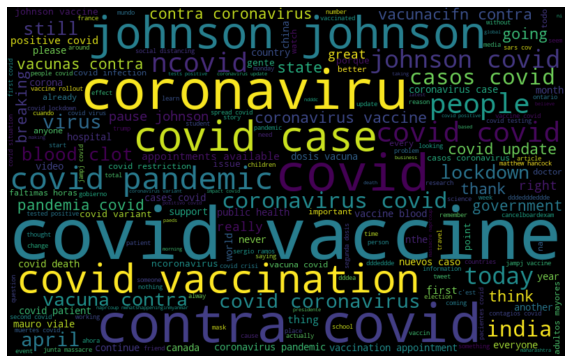

In [34]:
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [35]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

In [36]:
sid = SentimentIntensityAnalyzer()

In [37]:
scores = [sid.polarity_scores(i) for i in data.tidy_text]

In [38]:
df1 = pd.DataFrame(scores)

In [39]:
df1.count()

neg         740348
neu         740348
pos         740348
compound    740348
dtype: int64

In [40]:
data_copy = data

In [41]:
covid_mentalhealth = pd.concat([data_copy,df1], axis = 1)

In [42]:
covid_mentalhealth.head()

,id,text,month,tidy_text,neg,neu,pos,compound
0,1381308761533452291,Le #Portugal a d\u00e9cid\u00e9 de suspendre ...,Apr,portugal decide suspendre provenance bresiln c...,0.0,1.000,0.000,0.0000
1,1381308765841002501,Tommorrow is an exciting day as the Island mo...,Apr,tommorrow exciting island moves stage reconnec...,0.0,0.738,0.262,0.4939
2,1381308766482751493,Nos hacemos acopio de esta noticia publicada ...,Apr,hacemos acopio noticia publicada informacifn i...,0.0,1.000,0.000,0.0000
3,1381308768764370945,401 people,Apr,people,0.0,1.000,0.000,0.0000
4,1381308768898576387,@mybmc UK\u00a0Clinical Trial Confirms SaNOti...,Apr,ukaclinical trial confirms sanotizes breakthro...,0.0,1.000,0.000,0.0000


In [43]:
conditions = [(covid_mentalhealth['compound']>=0.05),(covid_mentalhealth['compound']<= - 0.05),(covid_mentalhealth['compound'] > -0.05) & (covid_mentalhealth['compound'] < 0.05)]
values = ['Positive', 'Negative','Neutral']
covid_mentalhealth['sentiments'] = np.select(conditions,values)

In [44]:
covid_mentalhealth.head()

,id,text,month,tidy_text,neg,neu,pos,compound,sentiments
0,1381308761533452291,Le #Portugal a d\u00e9cid\u00e9 de suspendre ...,Apr,portugal decide suspendre provenance bresiln c...,0.0,1.000,0.000,0.0000,Neutral
1,1381308765841002501,Tommorrow is an exciting day as the Island mo...,Apr,tommorrow exciting island moves stage reconnec...,0.0,0.738,0.262,0.4939,Positive
2,1381308766482751493,Nos hacemos acopio de esta noticia publicada ...,Apr,hacemos acopio noticia publicada informacifn i...,0.0,1.000,0.000,0.0000,Neutral
3,1381308768764370945,401 people,Apr,people,0.0,1.000,0.000,0.0000,Neutral
4,1381308768898576387,@mybmc UK\u00a0Clinical Trial Confirms SaNOti...,Apr,ukaclinical trial confirms sanotizes breakthro...,0.0,1.000,0.000,0.0000,Neutral


In [45]:
c1 = (covid_mentalhealth['sentiments']=='Neutral')
c2 = (covid_mentalhealth['sentiments'] == 'Positive')
c3 = (covid_mentalhealth['sentiments'] == 'Negative') 

covid_mentalhealth['target'] = np.select([c1,c2,c3],[1,2,3],default = 'Other')

In [46]:
covid_mentalhealth.head()

,id,text,month,tidy_text,neg,neu,pos,compound,sentiments,target
0,1381308761533452291,Le #Portugal a d\u00e9cid\u00e9 de suspendre ...,Apr,portugal decide suspendre provenance bresiln c...,0.0,1.000,0.000,0.0000,Neutral,1
1,1381308765841002501,Tommorrow is an exciting day as the Island mo...,Apr,tommorrow exciting island moves stage reconnec...,0.0,0.738,0.262,0.4939,Positive,2
2,1381308766482751493,Nos hacemos acopio de esta noticia publicada ...,Apr,hacemos acopio noticia publicada informacifn i...,0.0,1.000,0.000,0.0000,Neutral,1
3,1381308768764370945,401 people,Apr,people,0.0,1.000,0.000,0.0000,Neutral,1
4,1381308768898576387,@mybmc UK\u00a0Clinical Trial Confirms SaNOti...,Apr,ukaclinical trial confirms sanotizes breakthro...,0.0,1.000,0.000,0.0000,Neutral,1


In [47]:
covid_mentalhealth['sentiments'].value_counts()

Neutral     592295
Positive     82901
Negative     65152
Name: sentiments, dtype: int64

In [48]:
sentiment_freq = pd.DataFrame(covid_mentalhealth['sentiments'].value_counts())

In [49]:
sentiment_freq.reset_index(inplace = True)

In [50]:
sentiment_freq.columns = ['sentiments','frequency']

Text(0, 0.5, 'Tweet_frequency')

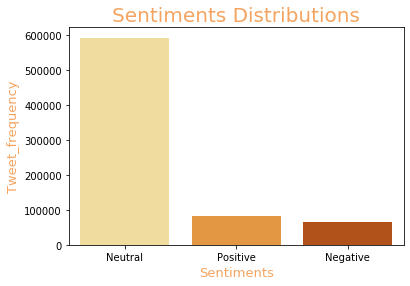

In [51]:
sns.barplot(x = 'sentiments', y = 'frequency', data = sentiment_freq, palette = "YlOrBr")
plt.title('Sentiments Distributions',fontsize= 20, color = 'sandybrown')
plt.xlabel('Sentiments',fontsize = 13, color = 'sandybrown')
plt.ylabel('Tweet_frequency', fontsize = 13,color = 'sandybrown' )

In [52]:
df= covid_mentalhealth

In [53]:
df = df[['tidy_text','sentiments']]

In [74]:
xwords = pd.Series(['coronavirus','vaccines','vaccination','covid','johnson','government','lockdown','india','blood','think','pneumonia','covid19','covid','italy','country','pandemic','mental','south','korea','outbreak','spread','trump',])

In [75]:
banned_words = set(word.strip().lower() for word in xwords)

In [76]:
def delete_banned_words(matchobj):
    word = matchobj.group(0)
    if word.lower() in banned_words:
        return ""
    else:
        return word

In [77]:
word_pattern = re.compile('\w+')

In [78]:
df['tidy_text'] = [word_pattern.sub(delete_banned_words,sentence) for sentence in df['tidy_text']]

In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output


import collections
import nltk
from keras.preprocessing import sequence
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [80]:
train, test = train_test_split(df,test_size = 0.3)

# Removing neutral sentiments
train = train[train.sentiments != "Neutral"]
test = test[test.sentiments != 'Neutral']

In [81]:
train.head()

,tidy_text,sentiments
661340,matalbi_sarkahr_sagaledddef\npandharpur electi...,Positive
37652,please retweet,Positive
162742,colleges hoping return normalcy weighing urgin...,Positive
605742,vacant everyone desperately searching,Negative
190879,dcddeedcddfdddcca israeli believe actions ultr...,Negative


In [82]:
train_pos = train[ train['sentiments'] == 'Positive']
train_pos = train_pos['tidy_text']
train_neg = train[ train['sentiments'] == 'Negative']
train_neg = train_neg['tidy_text']

Positive words


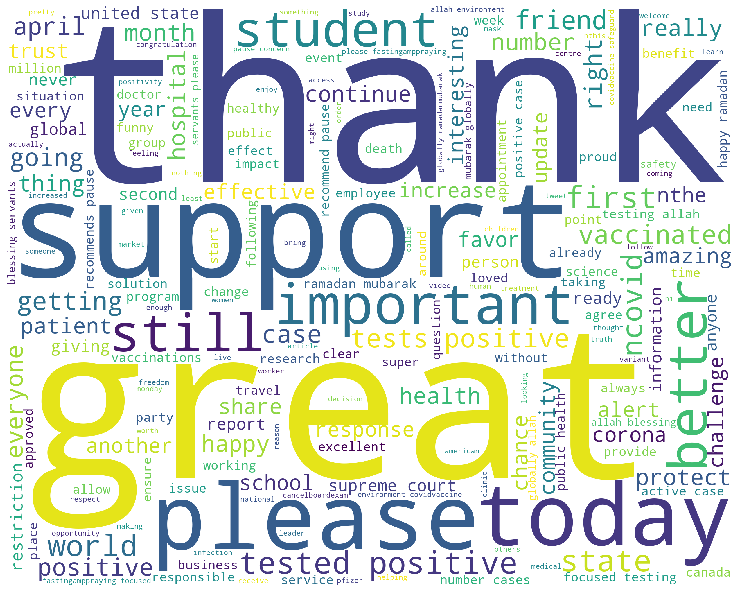

Negative words


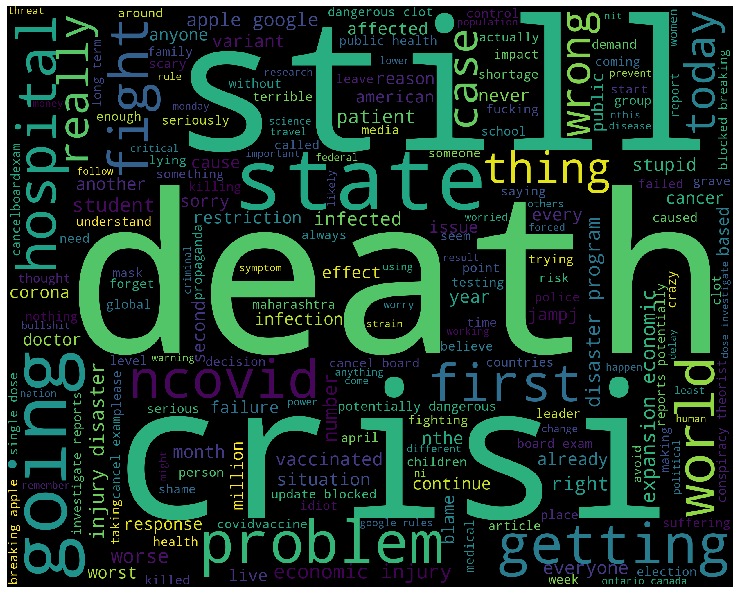

In [83]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                          width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)